### MALL VISITING CUSTOMERS- KMEANS CLUSTERING  by-Nikesh Bekkam

#### Importing Libraries

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading Dataset

In [10]:
df=pd.read_csv(r'C:\Users\nikes\OneDrive\Desktop\ADS -2/Mall_Customers.csv')

In [11]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Checking for Duplicated & Null values

In [12]:
df.duplicated().sum()

0

In [13]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### EDA + Visualization

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
df.describe(include=['object','int64'])

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [16]:
df.Gender.value_counts()


Gender
Female    112
Male       88
Name: count, dtype: int64

In [17]:
df['Gender'] = df['Gender'].map({'Female': '0', 'Male': '1'})
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


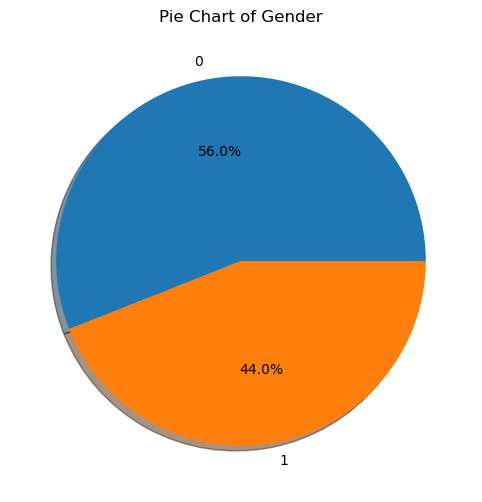

In [18]:
def PiePlot(column):
    plt.figure(figsize=(12,6))
    plt.pie(df[column].value_counts(), labels = df[column].value_counts().index, shadow = True, autopct = "%1.1f%%")
    plt.title(f'Pie Chart of {column}')
    plt.show()
PiePlot('Gender')

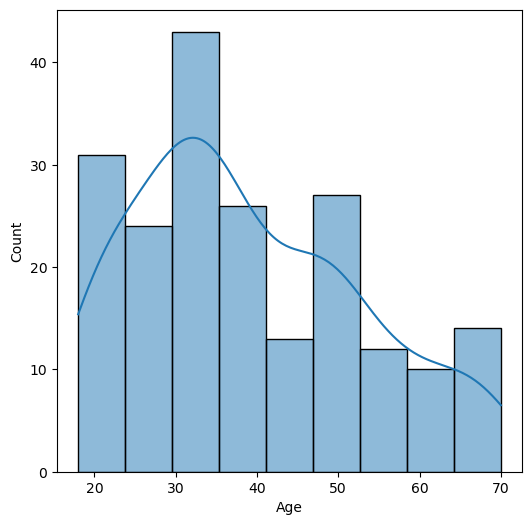

In [19]:
plt.figure(figsize=(6,6))
sns.histplot(data=df,x=df.Age,kde=True,stat='count')
plt.show()

In [20]:
gender_income=df.groupby('Gender')['Annual Income (k$)'].mean()
print(gender_income)

Gender
0    59.250000
1    62.227273
Name: Annual Income (k$), dtype: float64


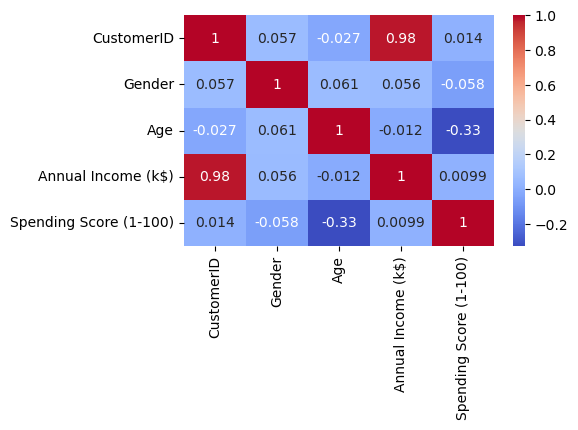

In [21]:
corr_matrix = df.corr()

plt.figure(figsize = (5, 3))
ax = sns.heatmap(corr_matrix,
                 annot = True, 
                 cmap = 'coolwarm')

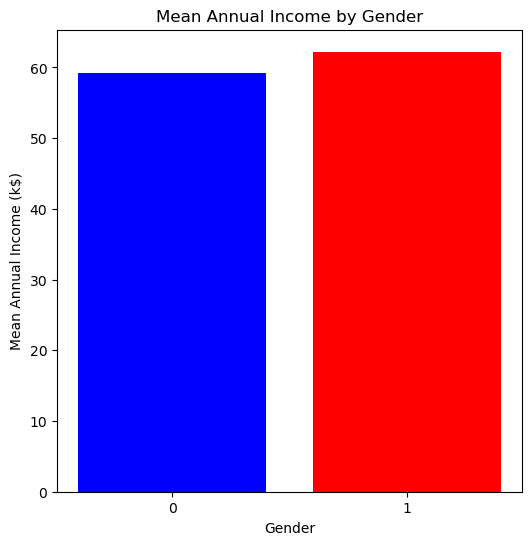

In [22]:
plt.figure(figsize=(6,6))
plt.bar(gender_income.index, gender_income.values, color=['blue', 'red'])
plt.xlabel('Gender')
plt.ylabel('Mean Annual Income (k$)')
plt.title('Mean Annual Income by Gender')
plt.show()

In [23]:
df[df['Spending Score (1-100)']==df['Spending Score (1-100)'].min()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
156,157,1,37,78,1
158,159,1,34,78,1


In [24]:
df[df['Spending Score (1-100)']==df['Spending Score (1-100)'].max()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
11,12,0,35,19,99


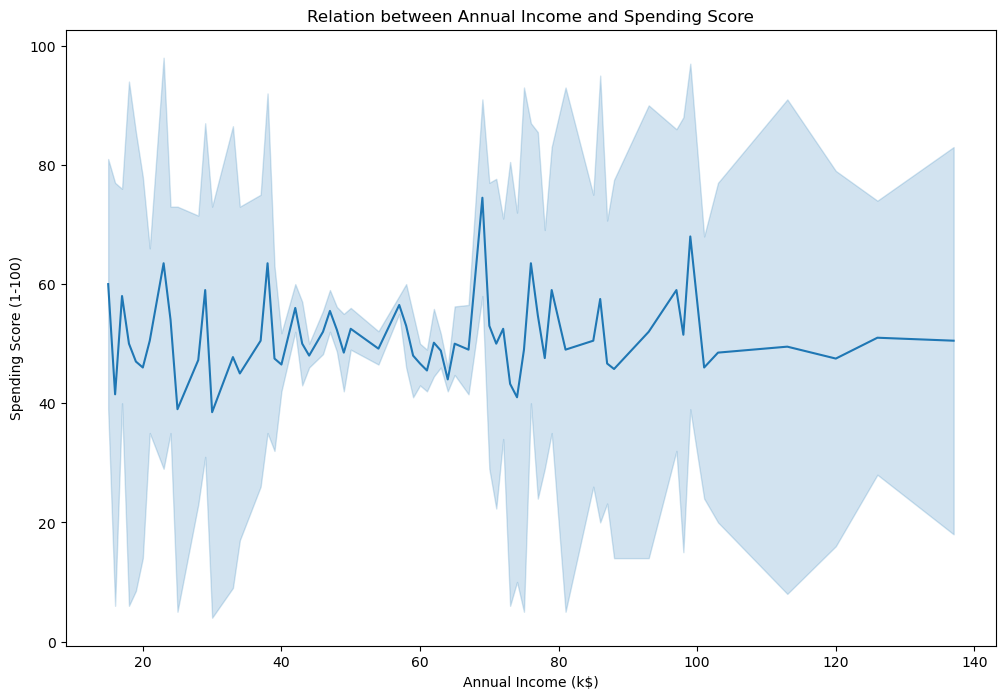

In [25]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df,x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'])
plt.title('Relation between Annual Income and Spending Score')
plt.show()

In [26]:
gender_score=df.groupby('Gender')['Spending Score (1-100)'].mean()
print(gender_score)

Gender
0    51.526786
1    48.511364
Name: Spending Score (1-100), dtype: float64


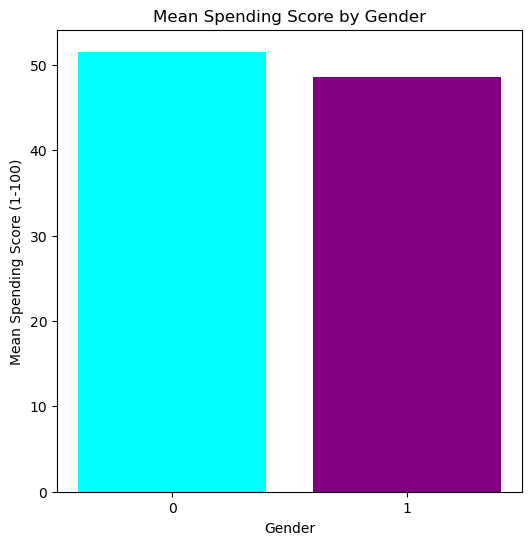

In [27]:
plt.figure(figsize=(6,6))
plt.bar(gender_score.index, gender_score.values, color=['cyan', 'purple'])
plt.xlabel('Gender')
plt.ylabel('Mean Spending Score (1-100)')
plt.title('Mean Spending Score by Gender')
plt.show()

In [28]:
x = df.iloc[:, [3, 4]].values

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
StandardScaler(copy=True, with_mean=True, with_std=True)
x_scaled=scaler.transform(x)
x_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

C:\Users\nikes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nikes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nikes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nikes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

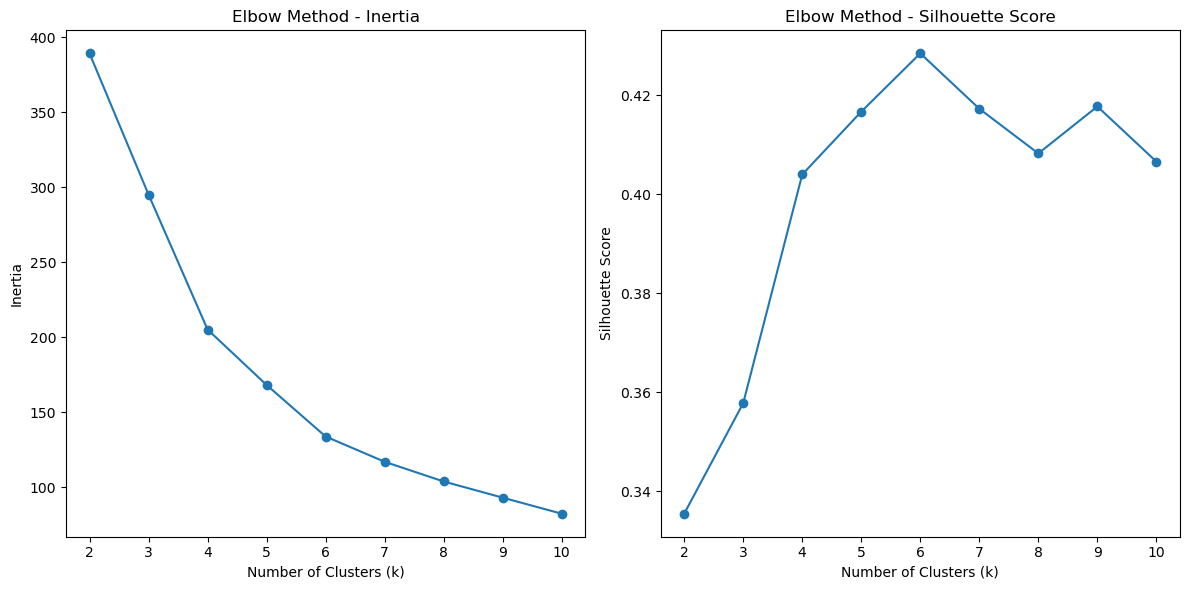

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
silhouette_scores = []
k_values = range(2, 11)  '''You can adjust the range based on your preference'''

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method - Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Elbow Method - Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

C:\Users\nikes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nikes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nikes\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


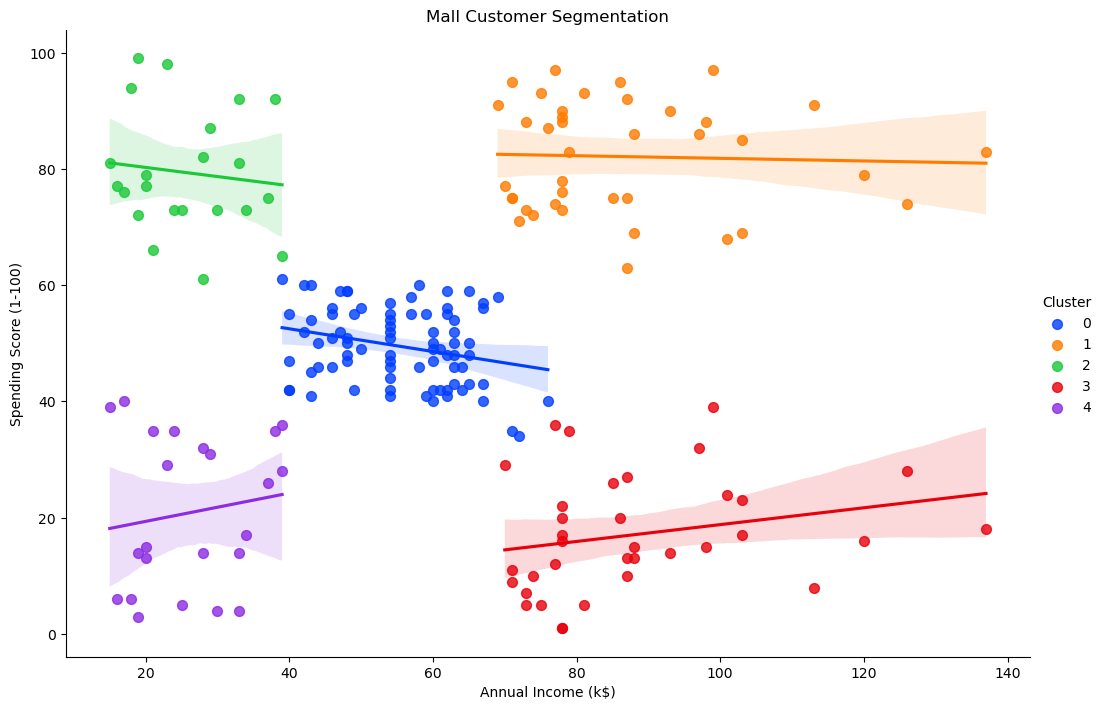

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


'''Selecting features for clustering'''
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

''' Standardize the features '''
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

'''Adding cluster labels using KMeans'''
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

''' Plotting with regression lines '''

sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='bright', height=7, aspect=1.5, scatter_kws={'s': 50})
plt.title('Mall Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


### Best cluster to use here is 5 clusters

C:\Users\nikes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nikes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


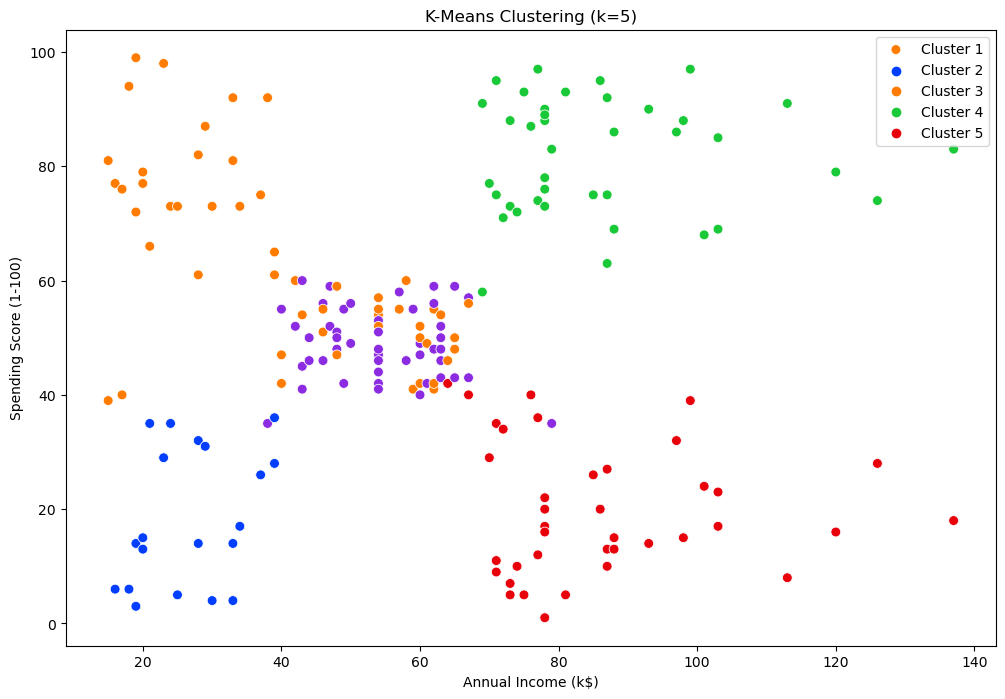

In [31]:
k = 5 
legend_labels = [f'Cluster {i+1}' for i in range(k)]
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
plt.figure(figsize=(12,8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='bright', s=50)
plt.title(f'K-Means Clustering (k={k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(legend_labels)
plt.show()